In [23]:
import pandas as pd
customers=pd.read_csv("./Datasets/Mall_Customers.csv")
customers


,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15.0,39.0
1,2,Male,21,15.0,81.0
2,3,Female,20,16.0,6.0
3,4,Female,23,16.0,77.0
4,5,Female,31,17.0,40.0
...,...,...,...,...,...
195,196,Female,35,120.0,79.0
196,197,Female,45,126.0,NaN
197,198,Male,32,126.0,74.0
198,199,Male,32,137.0,18.0


In [24]:
# Checking for empties
customers.isnull().sum()

CustomerID        0
Gender            4
Age               0
Annual Income     1
Spending Score    3
dtype: int64

In [25]:
customers=customers.dropna(subset=["Spending Score"])
customers=customers.dropna(subset=["Gender"])
customers=customers.dropna(subset=["Annual Income"])
customers.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

In [26]:
customers.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

In [27]:
# step1:data preprossesing/identify data types
# step2:Data exploration-fetching and displaying in table format
# step3:Data cleaning
# step4:Data analysis
# step5:EDA/clustering/regression

In [28]:
# Data analysis
customers.describe()

,CustomerID,Age,Annual Income,Spending Score
count,192.000000,192.000000,192.000000,192.000000
mean,98.177083,38.890625,59.395833,50.416667
std,57.300255,14.059467,25.699218,25.810898
min,1.000000,18.000000,15.000000,1.000000
25%,48.750000,28.750000,40.000000,35.000000
50%,97.500000,36.000000,60.000000,50.000000
75%,146.250000,49.000000,77.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [29]:
# clustering
array=customers.values
array

array([[1, 'Male', 19, 15.0, 39.0],
       [2, 'Male', 21, 15.0, 81.0],
       [3, 'Female', 20, 16.0, 6.0],
       [4, 'Female', 23, 16.0, 77.0],
       [5, 'Female', 31, 17.0, 40.0],
       [6, 'Female', 22, 17.0, 76.0],
       [7, 'Female', 35, 18.0, 6.0],
       [8, 'Female', 23, 18.0, 94.0],
       [9, 'Male', 64, 19.0, 3.0],
       [10, 'Female', 30, 19.0, 72.0],
       [11, 'Male', 67, 19.0, 14.0],
       [12, 'Female', 35, 19.0, 99.0],
       [13, 'Female', 58, 20.0, 15.0],
       [14, 'Female', 24, 20.0, 77.0],
       [15, 'Male', 37, 20.0, 13.0],
       [16, 'Male', 22, 20.0, 79.0],
       [17, 'Female', 35, 21.0, 35.0],
       [18, 'Male', 20, 21.0, 66.0],
       [19, 'Male', 52, 23.0, 29.0],
       [20, 'Female', 35, 23.0, 98.0],
       [21, 'Male', 35, 24.0, 35.0],
       [22, 'Male', 25, 24.0, 73.0],
       [23, 'Female', 46, 25.0, 5.0],
       [24, 'Male', 31, 25.0, 73.0],
       [25, 'Female', 54, 28.0, 14.0],
       [26, 'Male', 29, 28.0, 82.0],
       [27, 'Female', 4

In [30]:
customers

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15.0,39.0
1,2,Male,21,15.0,81.0
2,3,Female,20,16.0,6.0
3,4,Female,23,16.0,77.0
4,5,Female,31,17.0,40.0
...,...,...,...,...,...
194,195,Female,47,120.0,16.0
195,196,Female,35,120.0,79.0
197,198,Male,32,126.0,74.0
198,199,Male,32,137.0,18.0


In [31]:
from sklearn.impute import SimpleImputer

features=["Age","Annual Income","Spending Score"]
imputer=SimpleImputer(strategy="mean")
x=imputer.fit_transform(customers[features])

In [32]:
# split data into clusters
from sklearn.cluster import KMeans as km
model=km(n_clusters=12,random_state=42)
model.fit(x)

KMeans(n_clusters=12, random_state=42)

In [36]:
# FIND the mean of the groups
means=model.cluster_centers_
means

array([[ 43.        ,  46.0952381 ,  45.95238095],
       [ 32.58064516,  80.4516129 ,  82.70967742],
       [ 45.23076923,  98.92307692,  20.        ],
       [ 24.61538462,  23.76923077,  85.76923077],
       [ 51.41666667,  25.16666667,  11.5       ],
       [ 23.29166667,  59.58333333,  49.04166667],
       [ 64.0952381 ,  53.19047619,  50.38095238],
       [ 37.46666667,  77.26666667,   9.8       ],
       [ 32.625     ,  23.375     ,  30.5       ],
       [ 33.83333333, 117.        ,  80.16666667],
       [ 27.27272727,  30.72727273,  68.36363636],
       [ 46.94117647,  65.41176471,  45.82352941]])

In [37]:
# create a table for our groups
clusters=pd.DataFrame(means,columns=["Age","Income","Spending Score"])
clusters

,Age,Income,Spending Score
0,43.000000,46.095238,45.952381
1,32.580645,80.451613,82.709677
2,45.230769,98.923077,20.000000
3,24.615385,23.769231,85.769231
4,51.416667,25.166667,11.500000
5,23.291667,59.583333,49.041667
6,64.095238,53.190476,50.380952
7,37.466667,77.266667,9.800000
8,32.625000,23.375000,30.500000
9,33.833333,117.000000,80.166667


In [41]:
# create a new column group_number
customers["Group Number"]=model.labels_
customers.head(15)

,CustomerID,Gender,Age,Annual Income,Spending Score,Group Numbers,Group Number
0,1,Male,19,15.0,39.0,8,8
1,2,Male,21,15.0,81.0,3,3
2,3,Female,20,16.0,6.0,8,8
3,4,Female,23,16.0,77.0,3,3
4,5,Female,31,17.0,40.0,8,8
5,6,Female,22,17.0,76.0,3,3
6,7,Female,35,18.0,6.0,4,4
7,8,Female,23,18.0,94.0,3,3
8,9,Male,64,19.0,3.0,4,4
9,10,Female,30,19.0,72.0,10,10


<AxesSubplot: xlabel='Group Number', ylabel='count'>

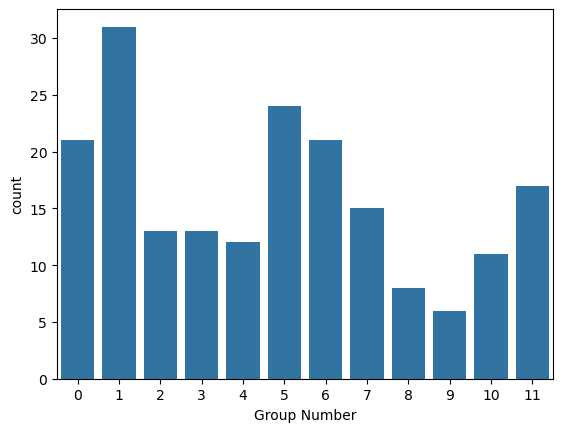

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=customers["Group Number"])


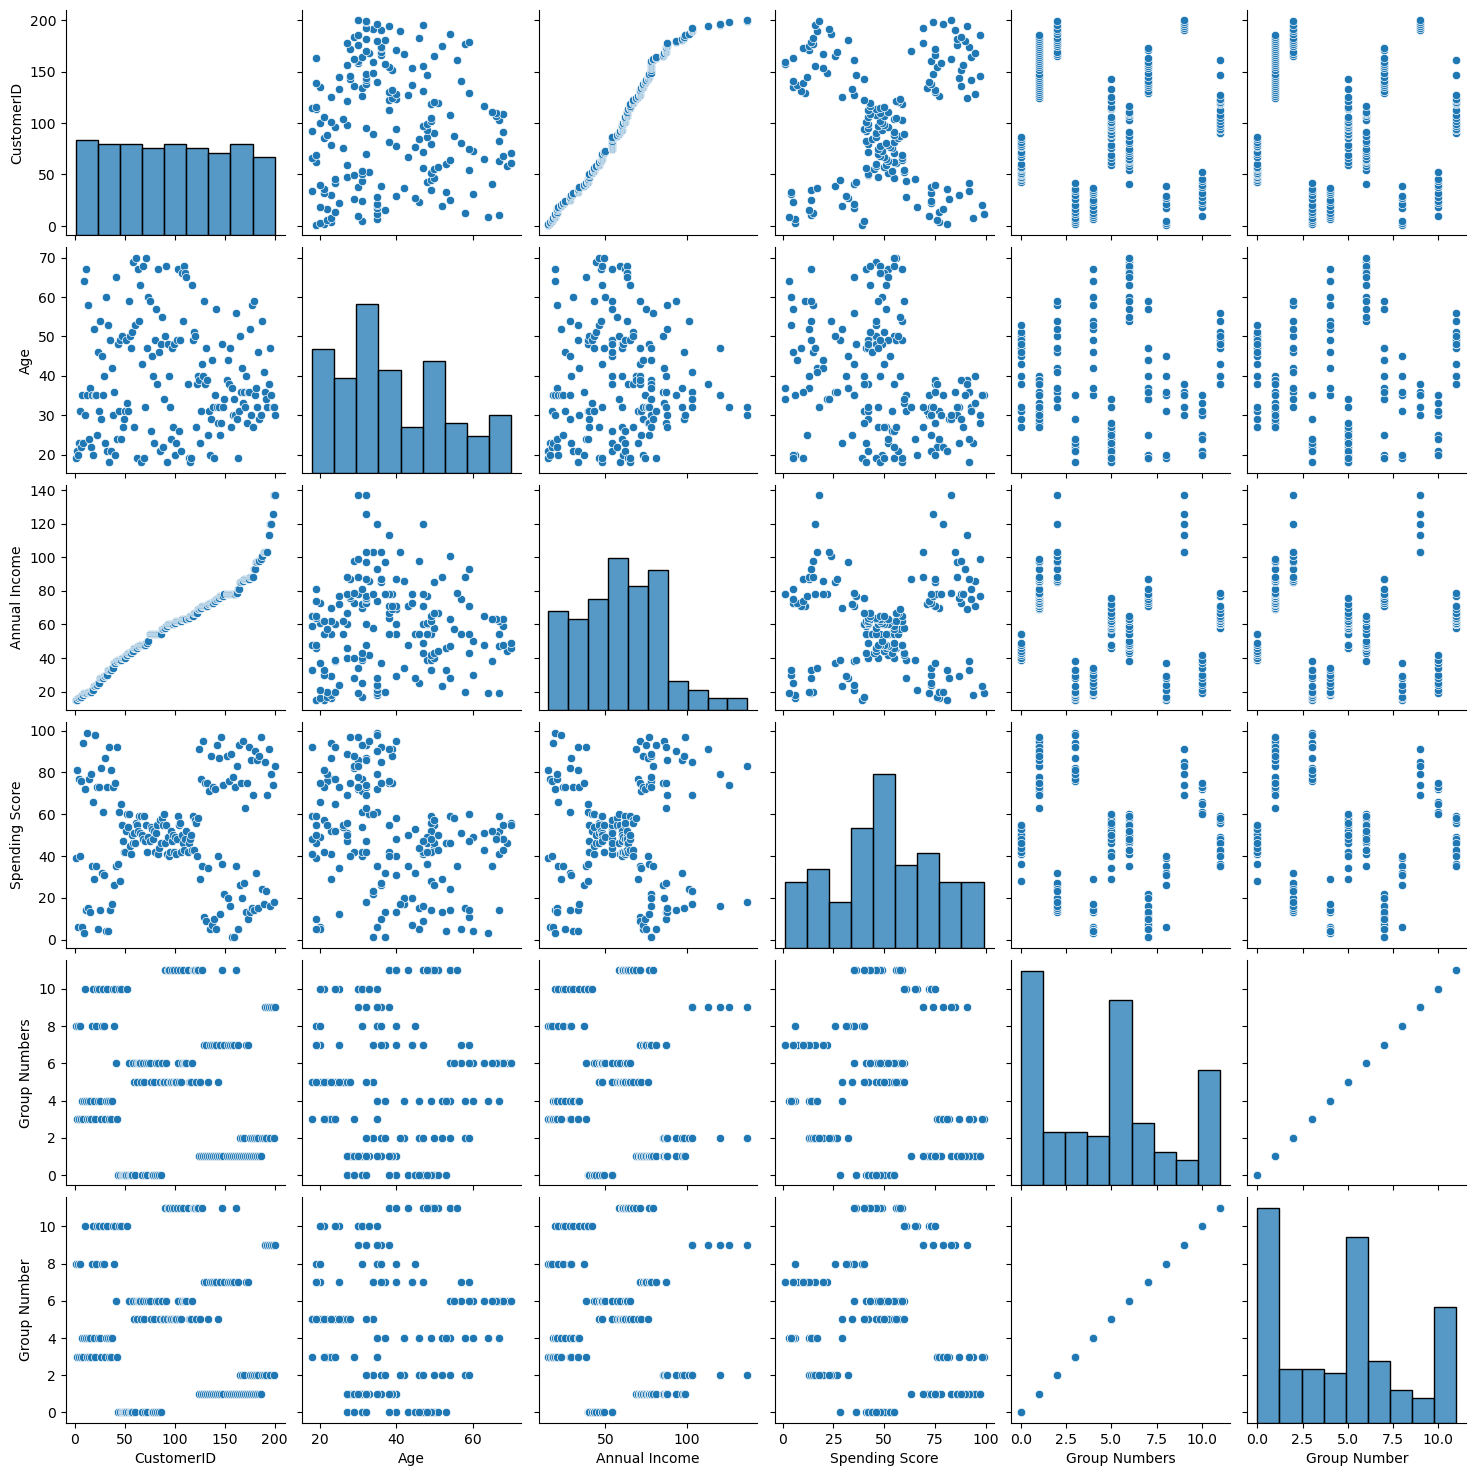

In [44]:
sns.pairplot(customers)


<AxesSubplot: xlabel='Group Number'>

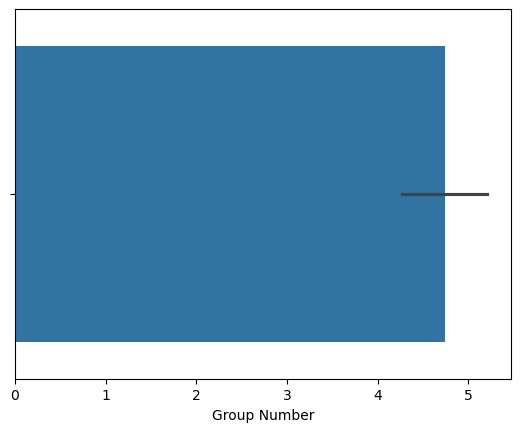

In [48]:
# create a barplot,scatterplot,swarmplot,for columns:x=age,y=annual income,hue=group_number
sns.barplot(x=customers['Group Number'])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, '19'),
  Text(1, 0, '20'),
  Text(2, 0, '21'),
  Text(3, 0, '22'),
  Text(4, 0, '23'),
  Text(5, 0, '24'),
  Text(6, 0, '30'),
  Text(7, 0, '31'),
  Text(8, 0, '35'),
  Text(9, 0, '37'),
  Text(10, 0, '52'),
  Text(11, 0, '58'),
  Text(12, 0, '64'),
  Text(13, 0, '67')])

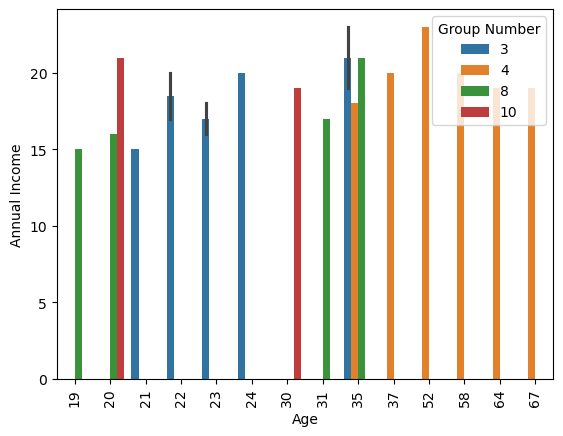

In [56]:
sns.barplot(data=customers.head(20),x="Age",y="Annual Income",hue="Group Number",palette="tab10")
plt.xticks(rotation=90)

<AxesSubplot: xlabel='Age', ylabel='Annual Income'>

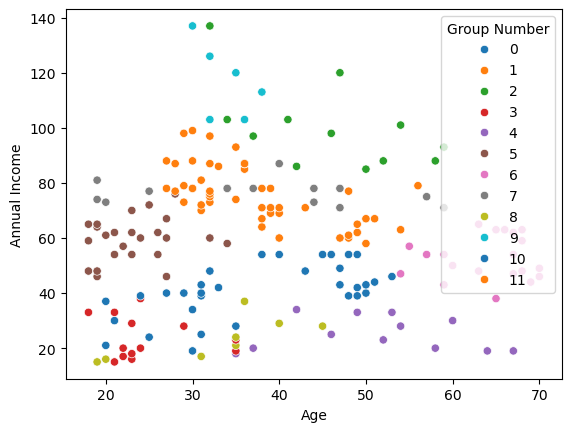

In [70]:
# scatterplot
sns.scatterplot(data=customers,x="Age",y="Annual Income",hue="Group Number",palette="tab10")

/usr/lib/python3/dist-packages/seaborn/categorical.py:3399: UserWarning: 28.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/lib/python3/dist-packages/seaborn/categorical.py:3399: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/lib/python3/dist-packages/seaborn/categorical.py:3399: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/lib/python3/dist-packages/seaborn/categorical.py:3399: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/lib/python3/dist-packages/seaborn/categorical.py:3399: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the 

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50],
 [Text(0, 0, '18'),
  Text(1, 0, '19'),
  Text(2, 0, '20'),
  Text(3, 0, '21'),
  Text(4, 0, '22'),
  Text(5, 0, '23'),
  Text(6, 0, '24'),
  Text(7, 0, '25'),
  Text(8, 0, '26'),
  Text(9, 0, '27'),
  Text(10, 0, '28'),
  Text(11, 0, '29'),
  Text(12, 0, '30'),
  Text(13, 0, '31'),
  Text(14, 0, '32'),
  Text(15, 0, '33'),
  Text(16, 0, '34'),
  Text(17, 0, '35'),
  Text(18, 0, '36'),
  Text(19, 0, '37'),
  Text(20, 0, '38'),
  Text(21, 0, '39'),
  Text(22, 0, '40'),
  Text(23, 0, '41'),
  Text(24, 0, '42'),
  Text(25, 0, '43'),
  Text(26, 0, '44'),
  Text(27, 0, '45'),
  Text(28, 0, '46'),
  Text(29, 0, '47'),
  Text(30, 0, '48'),
  Text(31, 0, '49'),
  Text(32, 0, '50'),
  Text(33, 0, '51'),

/usr/lib/python3/dist-packages/seaborn/categorical.py:3399: UserWarning: 28.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/lib/python3/dist-packages/seaborn/categorical.py:3399: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/lib/python3/dist-packages/seaborn/categorical.py:3399: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/lib/python3/dist-packages/seaborn/categorical.py:3399: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/lib/python3/dist-packages/seaborn/categorical.py:3399: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the 

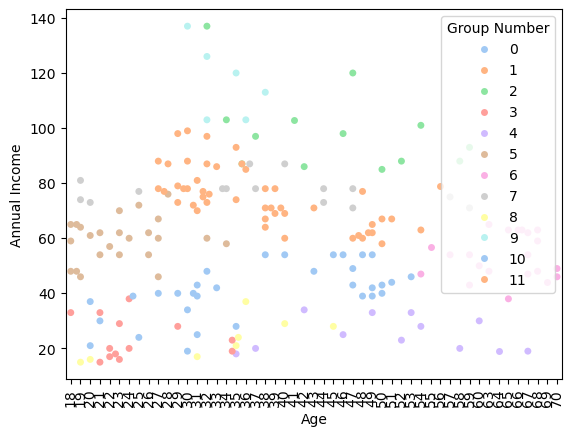

In [69]:
# SWARMPLOT
sns.swarmplot(data=customers,x="Age",y="Annual Income",hue="Group Number",palette="pastel")
plt.xticks(rotation=90)